In [11]:
import numpy as np
import matplotlib.pyplot as plt 


In [2]:
telescope_diameter = [i/100 for i in range(75,425,25)]
r_0 = list(range(1,21))

In [3]:
MAL_td = [34.8, 24.2, 14.4, 8.5, 5.2, 2.7, 1.9, 1.3, 1, 0.9, 0.8, 0.7, 0.6, 0.6]
DM_td = [53, 41, 32.5, 24.6, 18.3, 12.8, 9.6, 5.7, 5.3, 3.0, 2.7, 1.7, 1.8, 1.3]


In [4]:
print(np.array(r_0))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


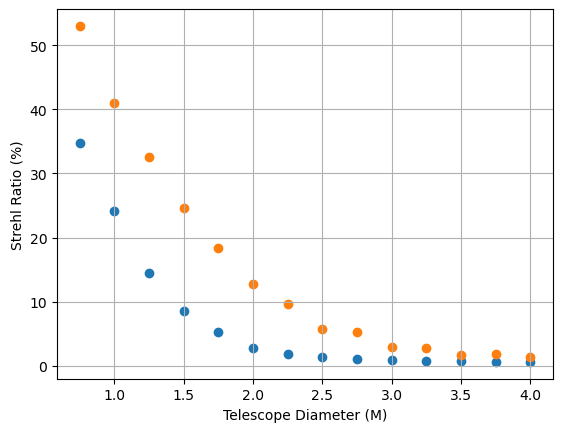

In [5]:
plt.scatter(telescope_diameter, MAL_td, label='MAL')
plt.scatter(telescope_diameter, DM_td, label='DM')
plt.xlabel('Telescope Diameter (M)')
plt.ylabel('Strehl Ratio (%)')
plt.grid()
plt.show()

In [6]:
import scipy as sp
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

In [23]:
def td_func(x, a, b, c):
    return a * np.exp(-b * x) + c

def r0_func(x, a, b, c):
    return a - (b*np.exp(c*x))

def residuals(ydata, theory_ydata):
    residual = ydata - theory_ydata 
    ss_residual = np.sum(residual**2)
    
    ss_tot = np.sum((ydata-np.mean(ydata))**2)
    
    r_squared = 1-(ss_residual/ss_tot)
    
    return r_squared 

def est(xdata, ydata, boundary, style, func): 
    popt, pcov = curve_fit(func, xdata, ydata, bounds=(1, boundary))
    r_squared = residuals(ydata, func(xdata,*popt))
    print(r_squared)
    return plt.plot(xdata, func(xdata, *popt), style)#, label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))


0.9928226209016512
0.9939907781533142


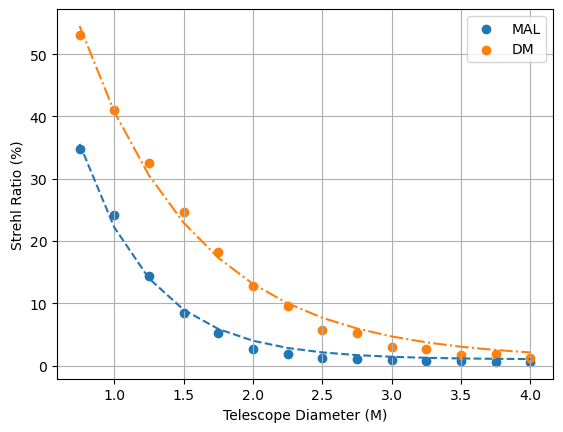

In [24]:
est(np.array(telescope_diameter), MAL_td, boundary = [150., 50., 10.0], style='--', func=td_func)
est(np.array(telescope_diameter), DM_td, boundary = [150., 50., 10.0], style='-.', func=td_func)
plt.scatter(telescope_diameter, MAL_td , label='MAL')
plt.scatter(telescope_diameter, DM_td, label='DM')
plt.xlabel('Telescope Diameter (M)')
plt.ylabel('Strehl Ratio (%)')
plt.legend()
plt.grid()
plt.show()

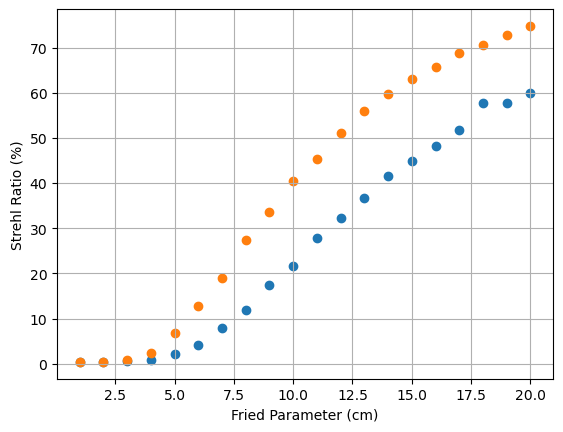

In [9]:
MAL_r0 = [0.4, 0.4, 0.5, 0.9, 2.1, 4.1, 7.9, 11.8, 17.5, 21.7, 27.8, 32.3, 36.7, 41.6, 44.8, 48.3, 51.7, 57.8, 57.7, 60.0]
DM_r0  = [0.4, 0.4, 0.8, 2.4, 6.8, 12.8, 19.0, 27.3, 33.5, 40.4, 45.4, 51.2, 55.9, 59.8, 63.0, 65.6, 68.7, 70.5, 72.9, 74.8]

plt.scatter(r_0, MAL_r0, label='MAL')
plt.scatter(r_0, DM_r0, label='DM')
plt.xlabel('Fried Parameter (cm)')
plt.ylabel('Strehl Ratio (%)')
plt.grid()
plt.show()

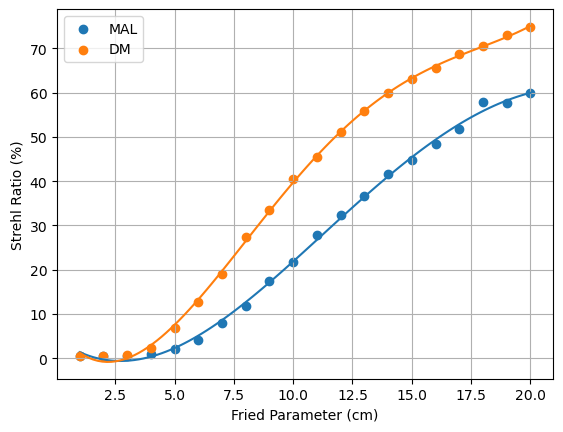

In [25]:
MAL_model = np.poly1d(np.polyfit(r_0, MAL_r0, 4))
MAL_line = np.linspace(1, 20, 100)

DM_model = np.poly1d(np.polyfit(r_0, DM_r0, 4))
DM_line = np.linspace(1, 20, 100)

plt.scatter(r_0, MAL_r0 , label='MAL')
plt.plot(MAL_line, MAL_model(MAL_line))
plt.scatter(r_0, DM_r0, label='DM')
plt.plot(DM_line, DM_model(DM_line))
plt.xlabel('Fried Parameter (cm)')
plt.ylabel('Strehl Ratio (%)')
plt.legend()
plt.grid()
plt.show()

In [26]:
print(r2_score(MAL_r0, MAL_model(r_0)))
print(r2_score(DM_r0, DM_model(r_0)))

0.9984787461182258
0.9995654643443336


In [28]:
np.polyfit(r_0, MAL_r0, 4)

array([ 3.28392877e-04, -3.37369990e-02,  8.86551469e-01, -4.09691963e+00,
        4.62168473e+00])

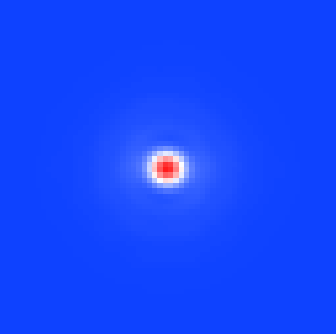

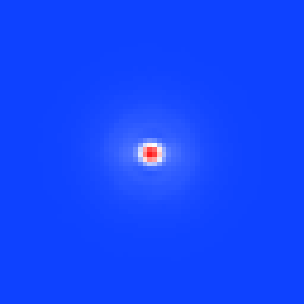

In [7]:
from PIL import Image

#read the image
im1 = Image.open("Experiment2_SC/MAL/MAL_1.png")
im2 = Image.open("Experiment2_SC/MAL/MAL_2.png")

#show images
display(im1)
display(im2)
#im2.show()